In [17]:
import sys
main_folder = '..'
if main_folder not in sys.path:
    sys.path.append(main_folder)

import numpy as np
import matplotlib.pyplot as plt
import torch
from mmdet.apis import init_detector, show_result_pyplot
from open_set.utils.eval.inference import inference_detector
import mmcv

In [453]:
# OVIS model
config_file = '../configs/demo/coco_instance_ag3x_1x.py'
checkpoint_file = '../checkpoints/coco_instance_ag3x_1x.pth'

In [454]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

/home/wjz/research/open-voc-seg/ours/lib/mmdetection/mmdet/models/losses/cross_entropy_loss.py:239: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initiali

load checkpoint from local path: ../checkpoints/coco_instance_ag3x_1x.pth


In [456]:
classes = model.panoptic_fusion_head.ordered_class_names
print(classes)
print(len(classes))
# Mark the novel categories by '*'
# Here we use COCO 48/17 base/novel split
unknown_cat_names = model.panoptic_head.unknown_cat_names
CLASSES = []
for name in classes:
    if name in unknown_cat_names:
        name = '*' + name
    CLASSES.append(name)
model.CLASSES = CLASSES

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'kite', 'skateboard', 'surfboard', 'bottle', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'pizza', 'donut', 'cake', 'chair', 'couch', 'bed', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'toothbrush']
65


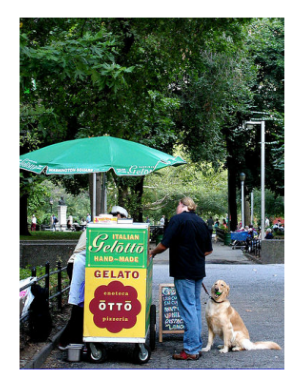

In [457]:
img = mmcv.imread('../examples/umbrella_dog.png').astype(np.uint8)
img = mmcv.bgr2rgb(img)
plt.axis('off')
plt.imshow(img)

In [458]:
# Predict segmentation results, as well as image captions
result = inference_detector(model, img, with_caption=True, logging=True)[0]

/home/wjz/research/open-voc-seg/ours/lib/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/wjz/research/open-voc-seg/ours/lib/mmdetection/mmdet/models/utils/positional_encoding.py:81: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)


[CLS] a couple of people standing under an umbrella [SEP] tensor(-3.9851)
[CLS] a group of people standing around a wooden bench [SEP] tensor(-3.6822)
[CLS] a group of people standing around a wooden structure [SEP] tensor(-3.7369)
[CLS] a couple of people standing under an umbrella. [SEP] tensor(-3.7376)
[CLS] a group of people standing around a wooden bench. [SEP] tensor(-3.4166)
[CLS] a group of people standing around a wooden table. [SEP] tensor(-3.4943)
[CLS] a group of people standing around a wooden structure. [SEP] tensor(-3.5319)


/home/wjz/research/open-voc-seg/cgg-open-source/notebooks/../open_set/models/maskformer_fusion_head.py:348: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  query_indices = top_indices // scores.shape[-1]


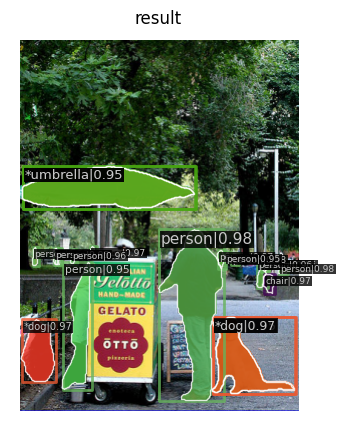

In [460]:
# show the results
show_result_pyplot(model, img, result, score_thr=0.95)

In [465]:
# OSPS model
config_file = '../configs/demo/coco_panoptic_p20.py'
checkpoint_file = '../checkpoints/coco_panoptic_p20.pth'

In [466]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

/home/wjz/research/open-voc-seg/ours/lib/mmdetection/mmdet/models/losses/cross_entropy_loss.py:239: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initiali

load checkpoint from local path: ../checkpoints/coco_panoptic_p20.pth


In [468]:
classes = model.CLASSES
unknown_cat_names = model.panoptic_head.unknown_cat_names
CLASSES = []
for name in classes:
    if name in unknown_cat_names:
        name = '*' + name
    CLASSES.append(name)
model.CLASSES = CLASSES
print(model.CLASSES)
print(len(model.CLASSES))

['person', '*bicycle', '*car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', '*boat', 'traffic light', 'fire hydrant', '*stop sign', 'parking meter', 'bench', 'bird', '*cat', 'dog', 'horse', 'sheep', '*cow', 'elephant', '*bear', '*zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', '*tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', '*banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', '*pizza', 'donut', '*cake', 'chair', 'couch', 'potted plant', 'bed', '*dining table', '*toilet', 'tv', 'laptop', 'mouse', 'remote', '*keyboard', 'cell phone', 'microwave', 'oven', 'toaster', '*sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'banner', 'blanket', 'bridge', 'cardboard', 'counter', 'curtain', 'door-stuff', 'floor-wood', 'flower', 'fruit', 'gravel',

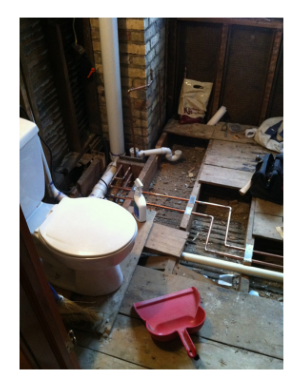

In [469]:
img = mmcv.imread('../examples/toilet.png').astype(np.uint8)
img = mmcv.bgr2rgb(img)
plt.axis('off')
plt.imshow(img)

In [470]:
# Predict segmentation results, as well as image captions
result = inference_detector(model, img, with_caption=True, logging=True)[0]

/home/wjz/research/open-voc-seg/ours/lib/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/wjz/research/open-voc-seg/ours/lib/mmdetection/mmdet/models/utils/positional_encoding.py:81: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)


[CLS] there are many different types of items on the ground [SEP] tensor(-4.1646)
[CLS] there are many different types of shoes on the ground [SEP] tensor(-4.1666)
[CLS] there are many different types of items on the floor [SEP] tensor(-4.1682)
[CLS] there are many different types of shoes on the floor [SEP] tensor(-4.1944)
[CLS] there are many different types of toilets in the same room [SEP] tensor(-4.1145)
[CLS] there are many different types of toilets in the same direction [SEP] tensor(-4.1379)
[CLS] there are many different types of toilets in the same time [SEP] tensor(-4.3035)


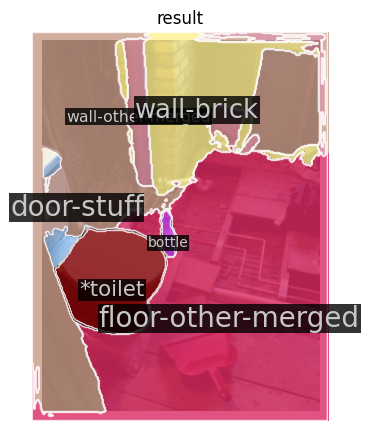

In [472]:
# show the results
show_result_pyplot(model, img, result)